In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
from math import sin, cos
from scipy.integrate import odeint

In [3]:
# generate initial conditions
phi = np.random.random(500)

[[ 5.03202721  4.82048691  4.66805595 ...  4.82297203  4.84330255
   5.09323497]
 [ 5.03202721  4.82048691  4.66805595 ...  4.82297203  4.84330255
   5.09323497]
 [ 5.03202721  4.82048691  4.66805595 ...  4.82297203  4.84330255
   5.09323497]
 ...
 [33.36844651 32.72096381 32.26202904 ... 32.7285007  32.7902254
  33.55791661]
 [33.51915048 32.86910463 32.4083538  ... 32.87667136 32.93864035
  33.70937083]
 [33.67075538 33.01813081 32.55555287 ... 33.02572755 33.08794232
  33.86173055]]


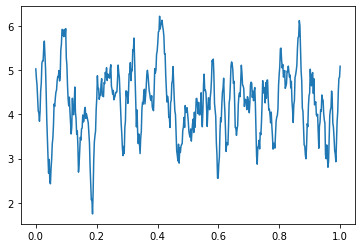

In [63]:
i = 10; L=5; B=1
phi[i-5:i+5]

def convolve1D(ar):
    convolved = np.zeros(len(ar))
    ar2 = np.concatenate([phi, phi]) # double array to prevent overflow indexing
    for i in range(len(ar)):
        convolved[i] = sum([np.exp(-(i-k)**2/(2*L**2))*ar2[k] for k in range(i-5, i+5)])
    return convolved
phi_conv = convolve1D(phi)

# define ramp-up function
def ramp(t):
    if t<5:
        return t*2
    else:
        return 10
rampv = np.vectorize(ramp)

def Kappa(p):
    return (1-p)**3/p**2
Kappav = np.vectorize(Kappa)

def grad_p(x, t,w=1):
    return -(1-x)*ramp(t)*w/Kappa(x)

def d_phi_dt(phi, t):
    deriv = np.zeros(len(phi))
    for i, x in enumerate(phi):
        p = grad_p(x, t)
        if p**2 < B**2/L**2:
            deriv[i] = 0
        else:
            deriv[i] = x*p**2 -B**2/L**2
    return deriv

from scipy.integrate import odeint

steps = odeint(d_phi_dt, phi_conv, np.linspace(0,1, 1000))
print(steps)

plt.plot(np.linspace(0, 1, len(phi)), convolve1D(phi))

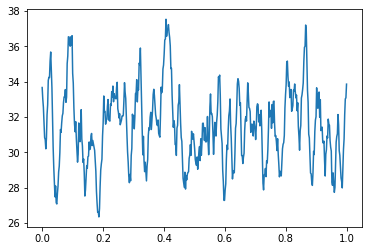

In [71]:
plt.plot(np.linspace(0,1,500), steps[999])
#plt.plot(np.linspace(0, 1, 500), phi_conv)